<a href="https://colab.research.google.com/github/AbhijeetBeedikar/Turbulent-JumpGrid/blob/main/Turbulent_JumpGrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setting up the environment

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict


class Grid:
  def __init__(self, rows = 8, cols = 8, obs = 10, start = (0,0), end = (7,7)):
    self.rows = rows
    self.cols = cols
    self.obstacles = obs
    self.state = start
    self.start = start
    self.end = end
    self.obsPos = self.obsShuffle()
    self.terminal = False

  def reset(self):
    self.state = self.start
    self.obsPos = self.obsShuffle()

  def render(self):
    '''
    for vizualizing the current state of the environment
    '''
    pic = [["o" for i in range(self.cols)] for j in range(self.rows)]
    pic[self.state[0]][self.state[1]] = "G"
    pic[self.end[0]][self.end[1]] = "F"
    for i in range(self.obstacles):
      pic[self.obsPos[i][0]][self.obsPos[i][1]] = "X"
    print(np.array(pic,dtype="U"))

  def step(self, state, action):
    '''
    returns the next state, reward and termination state after taking a valid action from a valid state
    '''
    # handling bad input parameters
    if action not in range(13):
      print("Invalid Action")
      return
    if state[0] >= self.rows or state[1] >= self.cols or state[0] < 0 or state[1] < 0:
      print("Invalid State")
      return

    # shuffling the holes in the environment
    self.obsPos = self.obsShuffle()
    actions = {0: (-1,0), 1: (1,0), 2: (0,-1), 3: (0,1), 4:(0,0), # 1 step
           5:(-2,0), 6:(2,0), 7: (0,-2), 8: (0,2),  # 2 step
           9:(-3,0), 10:(3,0), 11: (0,-3), 12: (0,3)} # 3 step

    # stochastically creating wind
    def wind():
      stepsize = np.random.choice([-2,-1,0,1,2])
      stepdir = np.random.choice([0,1,2,3,4])
      return np.array(actions[stepdir])*stepsize
    wind = wind()


    reward = -1 # default reward for not reaching the finish point
    terminate = False

    # state + action taken + wind = new state
    netAction = np.array(actions[action]) + np.array(wind)
    new_state = (min(self.rows -1, max(0,(state[0] + netAction[0]))),min(self.cols -1, max(0,(state[1] + netAction[1]))))

    # terminating state rewards
    if new_state in self.obsPos:
      reward = -5
      terminate = True
    elif new_state == self.end:
      reward = 10
      terminate = True

    # updating the state of the environment
    self.state = new_state
    self.terminal = terminate
    return self.state, reward, terminate

  def obsShuffle(self):
    '''
    used to randomly shuffle the arrangement of holes in the environment
    '''
    obsPos = []
    for i in range(self.obstacles):
      randPos = (int(np.random.rand()*self.rows),int(np.random.rand()*self.cols))
      while randPos == self.end or randPos in obsPos:
        randPos = (int(np.random.rand()*self.rows),int(np.random.rand()*self.cols))
      obsPos.append(randPos)
    return obsPos

## Evaluation Functions

In [7]:
# function to run the target policy in the environment and extract its performance
def runPi(runs):
  eplentest = []
  netRewardTest = []
  for i in range(runs):
    rtest = 0
    eptest = 1
    terminate = False
    env.reset()
    state = env.state
    while terminate == False:
      next_state, reward, terminate = env.step(state, pi[state])
      rtest += reward
      eptest += 1
      state = next_state
    eplentest.append(eptest)
    netRewardTest.append(rtest)
  eplen.append(np.mean(eplentest))
  netReward.append(np.mean(netRewardTest))
  return

In [10]:
# function to run evaluation metrics
def evaluate():
  x = []
  r = []
  for i in range(0,nep,int(nep/100)):
    x.append(np.mean([eplen[j] for j in range(i,i+int(nep/100))]))
    r.append(np.mean([netReward[j] for j in range(i,i+int(nep/100))]))

  success =0
  for i in range(10000):
    terminate = False
    env.reset()
    state = env.state
    while terminate == False:
      next_state, reward, terminate = env.step(state, pi[state])
      if terminate and reward == 10:
        success += 1
      state = next_state
  print(f"Agent success rate: {success/10000}")
  return (x, r, success/10000)


##Comparing the Performance between n-step methods

Streaming output truncated to the last 5000 lines.
Episode 30001
Episode 30002
Episode 30003
Episode 30004
Episode 30005
Episode 30006
Episode 30007
Episode 30008
Episode 30009
Episode 30010
Episode 30011
Episode 30012
Episode 30013
Episode 30014
Episode 30015
Episode 30016
Episode 30017
Episode 30018
Episode 30019
Episode 30020
Episode 30021
Episode 30022
Episode 30023
Episode 30024
Episode 30025
Episode 30026
Episode 30027
Episode 30028
Episode 30029
Episode 30030
Episode 30031
Episode 30032
Episode 30033
Episode 30034
Episode 30035
Episode 30036
Episode 30037
Episode 30038
Episode 30039
Episode 30040
Episode 30041
Episode 30042
Episode 30043
Episode 30044
Episode 30045
Episode 30046
Episode 30047
Episode 30048
Episode 30049
Episode 30050
Episode 30051
Episode 30052
Episode 30053
Episode 30054
Episode 30055
Episode 30056
Episode 30057
Episode 30058
Episode 30059
Episode 30060
Episode 30061
Episode 30062
Episode 30063
Episode 30064
Episode 30065
Episode 30066
Episode 30067
Episode 300

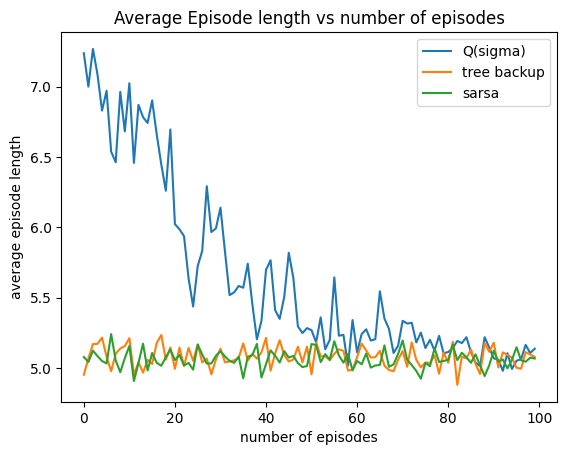

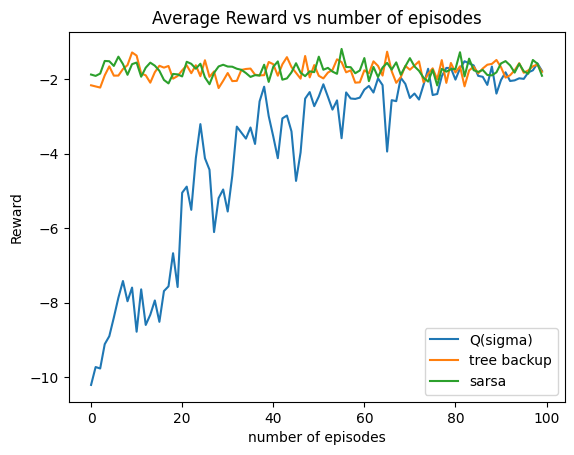

Success rates: 
Q(sigma) = 0.4258
tree backup = 0.4201
sarsa = 0.4166


In [19]:
actions = {0: (-1,0), 1: (1,0), 2: (0,-1), 3: (0,1), 4:(0,0), # 1 step
           5:(-2,0), 6:(2,0), 7: (0,-2), 8: (0,2),  # 2 step
           9:(-3,0), 10:(3,0), 11: (0,-3), 12: (0,3)} # 3 step

Q = defaultdict(lambda: 0)
pi = defaultdict(lambda: 10) # Stores greedy actions. default greedy action is to go down
visits = defaultdict(lambda: 0) # to have a CUSTOM DYNAMIC e-GREEDY POLICY and to tweak the state-dependant sigma

# hyperparameters
nep = 35000 # number of episodes
e = 0.8 # tweak this
gamma = 0.9
anneal = 0.98
alpha = 0.01 # high effect on learning rate (tweak to see large result differences) --> keep this small to reduce variance
n = 4 # arbitrary
ePi = 0.12 # we make the target policy more deterministic, but not completely deterministic to prevent skewed importance sampling ratios

env = Grid()

def nstep(learning):
  global eplen
  global netReward
  sigma = defaultdict(lambda: 1)
  if learning == "tree backup":
    sigma = defaultdict(lambda : 0)
  eplen = []
  netReward = []
  for i in range(nep): #1000 episodes
    print(f"Episode {i}")
    cumReward = 0
    env.reset()
    state = env.state
    sar = [] # storing (state,action,reward) for future use
    t = 0 # current time step
    T = np.inf # terminating time step is taken as infinity as we dont know when the episode terminates
    tau = t-n+1 # indicator that a state at time step tau has enough information to be updated and thus must be updated
    action = np.random.choice([pi[state],np.random.choice([i for i in actions if i != pi[state]])], p =[1-(e*(anneal**visits[state])),(e*(anneal**visits[state]))]) #choosing an initial action based on our behavior policy
    rho_t1 = [1] # rho_0 is kept as 1 to ensure no error when referred to in case.
                # Realistically rho_0 would be the importance sampling ratio of the first (state,action) pair in the episode.
                # However, this would never be used as rho always starts from t+1 when evaluating a value at time step t
    sar.append([state,action])
    while tau != T-1:
      if t < T: # time step is not terminal
        next_state, reward, terminated = env.step(state, action) # step wont be taken if the episode is terminated already
                                          # NOTE: next_state = S_{t+1}
        cumReward += reward
        sar[t].append(reward)
        sar.append([next_state])
        if terminated:
          T = t+1 # next time step is the last time step if episode terminates at then next state
        else:
          # NOTE: action = A_{t+1}
          action = np.random.choice([pi[next_state],np.random.choice([i for i in actions if i != pi[next_state]])], p =[1-(e*(anneal**visits[next_state])),(e*(anneal**visits[next_state]))])
          sar[t+1].append(action)
          pias = (1-(ePi*(anneal**visits[next_state])) if pi[next_state] == action else ePi*(anneal**visits[next_state])/12) # pi(a|s) for the next (state,action) pair
          bas = (1-(e*(anneal**visits[next_state])) if pi[next_state] == action else (e*(anneal**visits[next_state]))/12) # b(a|s) for the next (state,action) pair
          rho_t1.append(pias/bas)
      tau = t-n+1
      if tau >= 0:
        G = 0
        # n-Step Q(𝜎)
        if t+1 < T:
          G = Q[(sar[t+1][0],sar[t+1][1])]
        for k in reversed(range(tau + 1, min(tau+n,T))):
          if k == T:
            G = sar[k-1][2]
          else:
            V = 0
            for i in actions:
              sigma = defaultdict(lambda: 1)
              V += Q[(sar[k][0],i)]*(1-(ePi*(anneal**visits[sar[k][0]])) if i == pi[sar[k][0]] else ePi*(anneal**visits[sar[k][0]])/12)
            G += sar[k-1][2] + ((rho_t1[k]*sigma[sar[k][0]]) + (1-sigma[sar[k][0]])*((1-(ePi*(anneal**visits[sar[k][0]])) if sar[k][1] == pi[sar[k][0]] else ePi*(anneal**visits[sar[k][0]])/12)))*(G-Q[(sar[k][0],sar[k][1])]) + gamma*V
        Q[(sar[tau][0],sar[tau][1])] += alpha*(G-Q[(sar[tau][0],sar[tau][1])])

        #make pi greedy wrt Q
        greedyAction = []
        for i in actions:
          greedyAction.append(Q[(sar[tau][0],i)])
        pi[sar[tau][0]] = np.argmax(greedyAction)

        #state-dependent parameters are updated
        visits[sar[tau][0]] += 1
        if learning == "Q(sigma)":
          sigma[sar[tau][0]] = 0.99**(visits[sar[tau][0]])

      state = next_state
      t+=1
    runPi(3)
  return (evaluate(), pi, Q)

eval = []
for i in ["Q(sigma)", "tree backup", "sarsa"]:
  eval.append(nstep(i)[0])

plt.plot(eval[0][0], label = "Q(sigma)")
plt.plot(eval[1][0], label = "tree backup")
plt.plot(eval[2][0], label = "sarsa")
plt.legend()
plt.title("Average Episode length vs number of episodes")
plt.xlabel("number of episodes")
plt.ylabel("average episode length")
plt.show()

plt.plot(eval[0][1], label = "Q(sigma)")
plt.plot(eval[1][1], label = "tree backup")
plt.plot(eval[2][1], label = "sarsa")
plt.legend()
plt.title("Average Reward vs number of episodes")
plt.xlabel("number of episodes")
plt.ylabel("Reward")
plt.show()

print(f"Success rates: \nQ(sigma) = {eval[0][2]}\ntree backup = {eval[1][2]}\nsarsa = {eval[2][2]}")

